## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

#### Github
https://github.com/ThuyTran1530/CPSC_4800_Assignment3_part2.git

#### **Import packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### **Load data**

In [2]:
titanic = pd.read_csv("titanic.csv")

### **Basic data summary**

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
stats_df = titanic[['Age', 'Fare', 'SibSp', 'Parch']]
sum_stats = stats_df.describe().round(2)
sum_stats.loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%' ] , :]

,Age,Fare,SibSp,Parch
min,0.42,0.00,0.00,0.00
max,80.00,512.33,8.00,6.00
mean,29.70,32.20,0.52,0.38
std,14.53,49.69,1.10,0.81
25%,20.12,7.91,0.00,0.00
50%,28.00,14.45,0.00,0.00
75%,38.00,31.00,1.00,0.00


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Titanic** data set contains information of 891 passengers, including their survivor status, who boarded the ship in 1912 
* 891 observations, 12 varibles
* Numerical:
  * Float: Age, Fare
  * Integer: PassesgerId, SibSp, Parch
* Categorical:
  * Ordinal: Pclass
  * Nominal: Survived, Name, Sex, Ticket, Embarked, Cabin

* The data has 678 missing values for Cabin & 177 missing values for Age

### **EDA**

#### **Number of passengers by age group and gender**

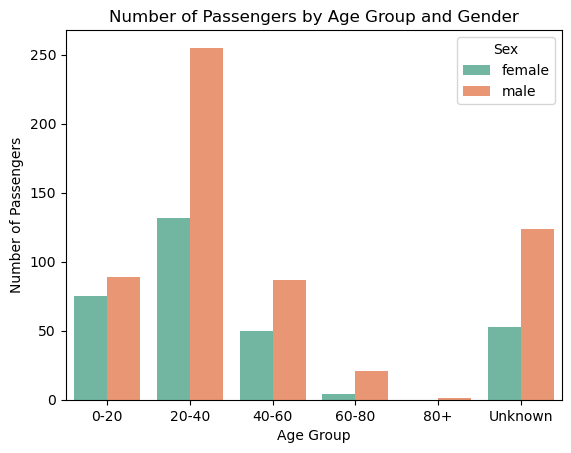

In [75]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

# Fill missing values for 'Age' with a placeholder of -1
titanic['AgeGroup'] = pd.cut(titanic['Age'].fillna(-1), bins = age_bins, labels = age_labels, right = False)

# Categorise na as 'Unknown'
titanic['AgeGroup'] = titanic['AgeGroup'].cat.add_categories(['Unknown'])
titanic.loc[titanic['Age'].isna(), 'AgeGroup'] = 'Unknown'

age_gender_counts = titanic.groupby(['AgeGroup', 'Sex'], observed = True).size().reset_index(name='Count')

# Plotting
sns.barplot(age_gender_counts,x = 'AgeGroup', y = 'Count', hue = 'Sex', palette='Set2')
plt.title('Number of Passengers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation = 0)

plt.savefig('Number of passengers by age group and gender.png')
plt.show()


* Majority of passesgers are within 20 to 40 years old
* There are more male passengers than female ones across all age groups
* 20% of passengers did not have their age recorded

#### **Distribution of Fare**

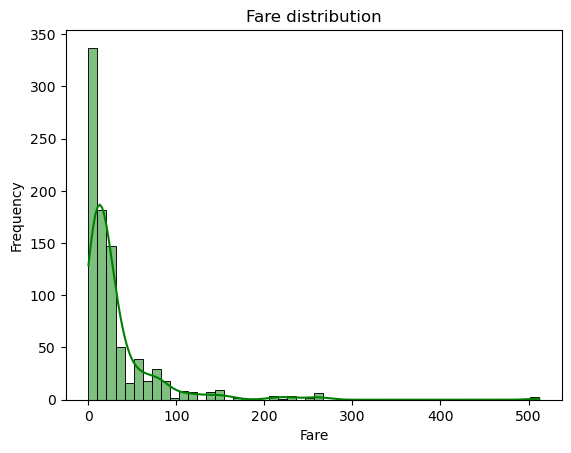

In [11]:
Fare = titanic['Fare'].dropna()

sns.histplot(Fare, bins = 50 , edgecolor = 'black', color = 'green', kde = True)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.savefig('Fare distribution.png')
plt.show()

* The distribution of ticket is highly skewed: there is a wide range of ticket price but majority of fare is 30 dollars and less.
* There are free tickets but there are also some very expensive tickets and could be more than 500 dollars

### **Survival by gender**

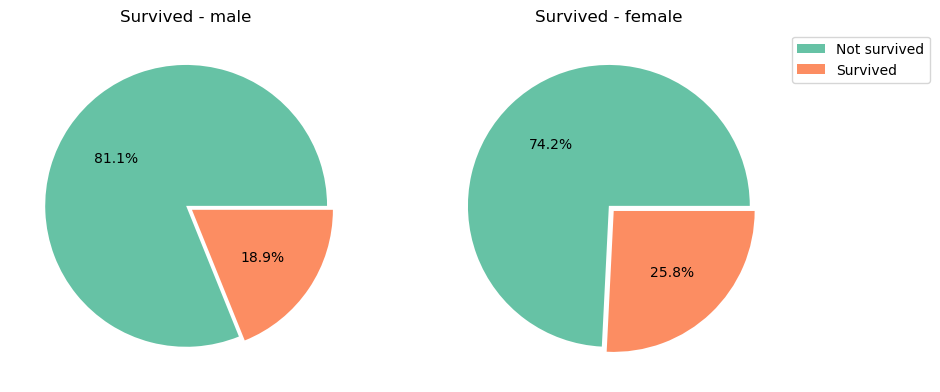

In [72]:
# Pie chart
f,ax = plt.subplots(1,2,figsize=(10,10))
colors = sns.color_palette('Set2', n_colors = 2)

titanic['Survived'][titanic['Sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.05], autopct = '%1.1f%%',ax = ax[0], labels=['', ''], colors=colors)
titanic['Survived'][titanic['Sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.05], autopct = '%1.1f%%',ax = ax[1], labels=['', ''], colors=colors)

ax[0].set_title('Survived - male')
ax[0].set_ylabel('')
ax[1].set_title('Survived - female')
ax[1].set_ylabel('')
ax[1].legend(labels = ['Not survived', 'Survived'], loc = 'upper left', bbox_to_anchor=(1, 1))

plt.savefig('Survival by gender.png')
plt.show()


### **Hypothesis testing**

#### **1. Hypothesis: Passengers with higher fares are more likely to survive**
* Using t-test to see if there is significant evidence that there is differences in fare mean of passsengers who were survived and those were not
* CI = 95%
* Plotting box plot of mean fare and survival rate

In [20]:
from scipy.stats import ttest_ind as ttest

# Filter survived and not survived
survived_fare = titanic[titanic['Survived'] == 1]['Fare'].dropna()
not_survived_fare = titanic[titanic['Survived'] == 0]['Fare'].dropna()

# Apply t-test
t_test, p_value = ttest(survived_fare, not_survived_fare)

# Result
print(f't-test = {t_test:.3f}')
print(f'p_value = {p_value}, less than 0.05 {p_value < 0.05}')

t-test = 7.939
p_value = 6.120189341924198e-15, less than 0.05 True


**Conclusion:**
* t-test = 7.939 is very significant. It suggest the mean fare of survived passenger is significantly different from the mean fare for non-survived ones (7.939 times standard deviation)
* p_value < 0.05 suggest that statistically, there is significant evidence that there is difference between the mean fare of survived passengers and non-survived passengers
* Box plot indicates that on average, survived passengers paid higher fair than non-survived ones.

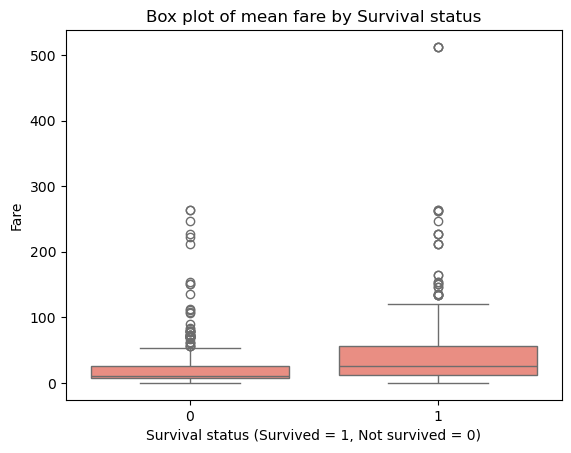

In [84]:
# Ploting box plot
sns.boxplot(titanic, x = 'Survived', y = 'Fare', color = 'salmon')
plt.title('Box plot of mean fare by Survival status')
plt.xlabel('Survival status (Survived = 1, Not survived = 0)')
plt.ylabel('Fare')
plt.savefig('Hypothesis: Passengers with higher fares are more likely to survive.png')
plt.show()

#### **2. Hypothesis: Survival is associated with point of embark**
* Using chi-squared to test if there is evidence to statistically conclude that survival is associated with and point of embark
* CI = 0.95%
* Plotting bar chart of number of survivors by point of embark

In [82]:
# Create contigency table
embark_table = pd.crosstab(titanic['Embarked'], titanic['Survived'])
print(embark_table)

# Chi-squared test
chi2_embark, p_value, dof, _ = stats.chi2_contingency(embark_table)

results = pd.DataFrame({
    'Chi-Square': [chi2_embark],
    'p-value': [p_value],
    'DoF': [dof]})

print(results.to_string(index = False))

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
 Chi-Square  p-value  DoF
   26.48915 0.000002    2


**Conclusion:**
* chi-squared = 26.489 suggests that there is difference between observed frequencies(or actual counts of survivors and non-survivors for each point of embark) and expected frequencies (expected counts of counts of survivors and non-survivors if there is no relationship between point of embark and survival) 
* p_value < 0.05 suggest that statistically, there is significant evidence that there is relationship between point of embark and survival
* Bar plot indicates number of survived & non-survived passengers at each point of embarkation. At embarkation S & Q, more passengers were died than those were 

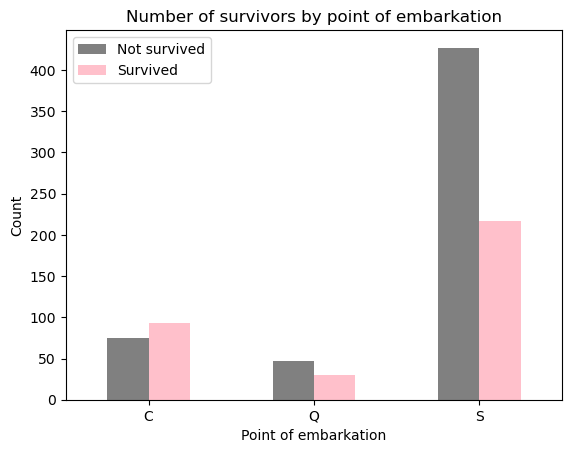

In [83]:
# Plotting
embark_table.plot(kind = 'bar', stacked = False, color = ['grey', 'pink'])
plt.title('Number of survivors by point of embarkation')
plt.xlabel('Point of embarkation')
plt.ylabel('Count')
plt.legend(labels = ['Not survived', 'Survived'])
plt.xticks(rotation = 0)
plt.savefig('Hypothesis: Survival is associated with point of embark.png')
plt.show()

#### **3. Hypothesis: passengers with siblings are more likely to survived**
* Using t-test to see if there is significant evidence suggests that passengers with siblings are more likely to survived
* CI = 95%
* Plotting boxplot of the mean number of siblings by survival

In [85]:
# Filter survived and non-survived
survived = titanic[titanic['Survived'] == 1]['SibSp']
non_survived = titanic[titanic['Survived'] == 0]['SibSp']

# Perform t-test
t_test, p_value = ttest(survived, non_survived)

# Result
print(f't-value: {t_test:.3f}')
print(f'p-value: {p_value}')

t-value: -1.054
p-value: 0.29224392869829374


**Conclusion:**
* t-value = -1.054 indicates that the mean number of siblings of those who were survived is slightly less than that of those who were not survived.
* p_value > 0.05 suggests that statistically, there is no significant evidence suggest that passengers with siblings are more likely to survive than those without siblings
* Bar plot counts number of survived and died passengers group by number of siblings

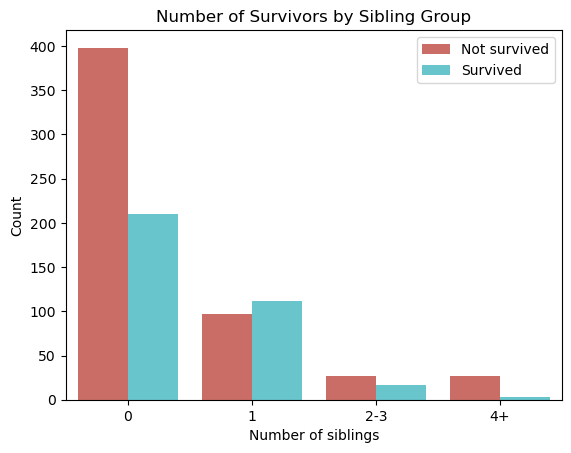

In [85]:
titanic['SibSp_Group'] = pd.cut(titanic['SibSp'], bins = [-1, 0, 1, 3, 10], labels = ['0', '1', '2-3', '4+'])

# Create a countplot to show the number of survivors in each sibling group
sns.countplot(titanic, x = 'SibSp_Group', hue = 'Survived', palette = "hls")

# Set plot title and labels
plt.title('Number of Survivors by Sibling Group')
plt.xlabel('Number of siblings')
plt.ylabel('Count')
plt.legend(labels = ['Not survived', 'Survived'])
plt.savefig('Hypothesis: passengers with siblings are more likely to survived.png')
plt.show()

In [87]:
# save data 
titanic.to_csv('titanic.csv')